In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# ------------------------------
# 1. Create Manual Housing Dataset
# ------------------------------
data = {
    'Size': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'Bedrooms': [1, 2, 2, 3, 3, 3, 4, 4, 4, 5],
    'Age': [10, 15, 20, 5, 8, 12, 1, 3, 4, 2],
    'Distance': [5, 10, 15, 5, 8, 12, 3, 4, 6, 2],
    'Price': [150, 180, 200, 210, 230, 250, 270, 300, 320, 350]  # target
}

df = pd.DataFrame(data)

# Features and target
X = df[['Size', 'Bedrooms', 'Age', 'Distance']]
y = df['Price']


In [9]:
# ------------------------------
# 2. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
# ------------------------------
# 3. Scaling
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# ------------------------------
# 4. Ridge Regression
# ------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# ------------------------------
# 5. Lasso Regression
# ------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)



Coefficient Comparison:
    Feature      Ridge      Lasso
0      Size  34.399610  67.559523
1  Bedrooms  24.130736   0.000000
2       Age   2.806344  15.395476
3  Distance  -1.808441  -9.217341


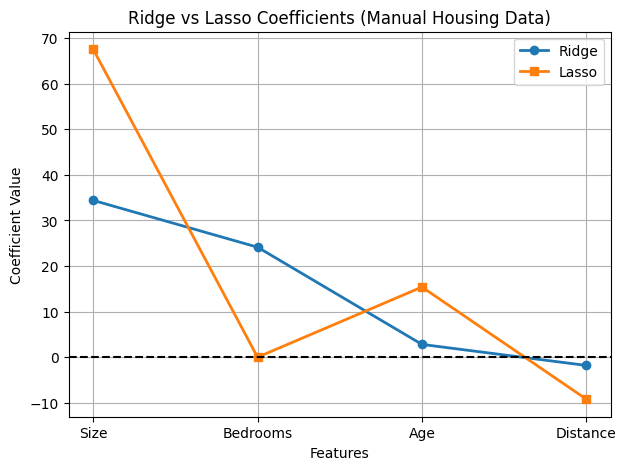

In [12]:
# ------------------------------
# 6. Compare Coefficients
# ------------------------------
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
print("\nCoefficient Comparison:")
print(coef_df)

# ------------------------------
# 7. Plot Coefficients (Line Plot)
# ------------------------------
plt.figure(figsize=(7,5))
plt.plot(X.columns, ridge.coef_, marker='o', label='Ridge', linewidth=2)
plt.plot(X.columns, lasso.coef_, marker='s', label='Lasso', linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (Manual Housing Data)")
plt.legend()
plt.grid(True)
plt.show()


R2 Scores:
Ridge R2: 0.9667150836873841
Lasso R2: 0.9924672495419166


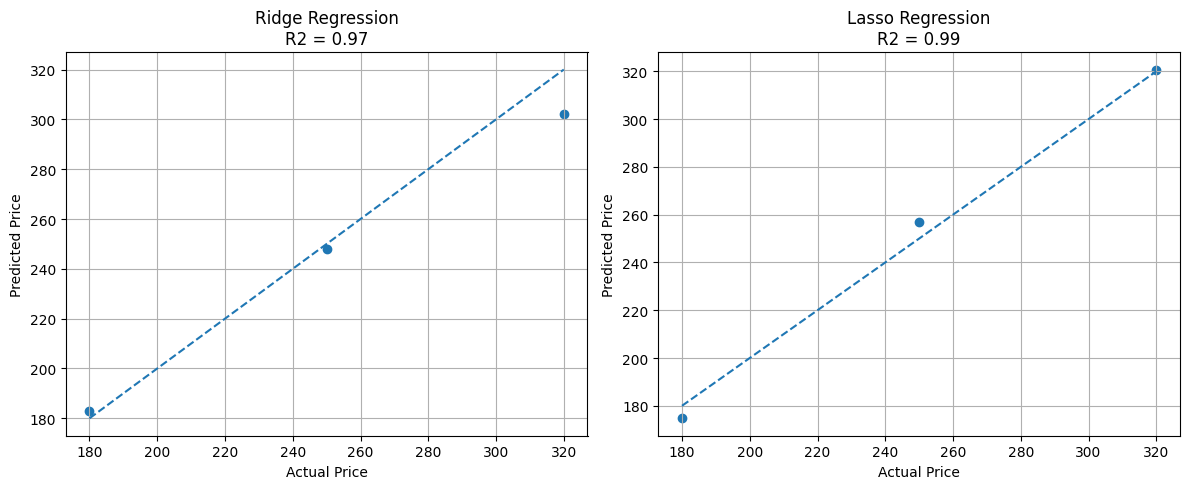

In [13]:
# ------------------------------
# 8. R2 Scores
# ------------------------------
print("\nR2 Scores:")
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))



plt.figure(figsize=(12,5))

# -------- Ridge --------
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression\nR2 = {r2_score(y_test, y_pred_ridge):.2f}")
plt.grid(True)

# -------- Lasso --------
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Lasso Regression\nR2 = {r2_score(y_test, y_pred_lasso):.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()
